# AB compartment analysis
#### HiCExplorer hicPCA was unsatisfactory prob due to the fact that the eigenvector is calculated genome-wide

## PART I: CALLING COMPARTMENTS WITH FAN-C
#### Correlation matrix

Compartments are derived from a correlation matrix, in which each entry i, j corresponds to the Pearson correlation between row i and column j of the (Hi-C) matrix.

The fanc compartments command can produce a correlation matrix (AB compartment) object from a FAN-C matrix file. By default, compartment matrices are calculated on a per-chromosome basis, since each chromosome might be normalised differently.

#### AB Eigenvector

The eigenvector of the correlation matrix is used to derive compartment type and strength for each matrix bin. Generally, regions with positive values are assigned the ‘A’, regions with negative values the ‘B’ compartment. 
fanc compartments outputs the first eigenvector by default. 

Specifically, you can supply a FASTA file with the genomic sequence to fanc compartments using the -g <fasta_file> argument. This is generally a good idea: fanc compartments then calculates the average GC content of regions with positive and those with negative eigenvector entries. As GC content has previously been shown to correlate well with compartmentalisation, the eigenvector is oriented in such a way that negative entries correspond to ‘B’ (low GC content) and positive entries to ‘A’ (high GC content).

#### AB domains

Consecutive matrix bins with the same eigenvector sign are considered part of a “domain”. You can use the -d <domain_file> option to write the AB domains to a BED file.
Again, it is recommended to supply the genome for a better assignment of ‘A’ and ‘B’ to each domain. 

### What I did
Call compartments in Azucena genome (az_mrg) at resolutions 10/80/160/320/640/1280kb (fanc_pc.sh)

Plot corr matrices, eigenvectors individually for each chromosome (fancplot.sh)

AB compartment coords are in BED format

Then compare the sign of the eigenvector for the chr01 with the resluts from The Plant Journal (2018) 94, 1141–1156 (Dong et al., 2018).

I will proceed with resolution 80kb, 160kb, 640kb, 1280kb to validation

Compartment coordinates are in fanc_Xkb.bed

# PART II: VALIDATING COMPARTMENT CALLS
#### Comparing relative enrichment of gene and transposable element (TE) density, H3K4me3, H3K18ac, H3K27me3, H3K27ac, DNA Methylation, GC content, gene expression (PRO-seq) in A/B compartments

The chromosome-wide method, which have been successfully applied to the smaller plant genomes such as Arabidopsis and rice to identify global compartments.

Regions classified as local A compartments are euchromatin regions with higher gene density and active epigenetic marks, while those grouped as local B compartments are heterochromatins with higher TE density and repressive marks. A compartments are associated with active chromatin marks as well as polycomb mark H3K27me3, while B compartments display heterochromatin features such as low gene density and high DNA methylation level.

We used expression data and showed that the median expression values per A compartment were higher than for B compartment for 160kb res

I will proceed with 160kb resolution

A and B compartment coordinates are in A.bed and B.bed

# PART III: TAD/nonTAD bodies distribution between A/B compartments

For this we chose TAD and nonTAD domains with at least five genes expressed, giving us a total of 1,247 domains (678 TAD domains and 569 nonTAD domains).

In [ ]:
First, we analyzed the how many TADs were found within A/B compartment 
#All TADs: az_TADs_5kb_two_tools_80.bed 1207 TADs

In [4]:
# Total length of all TADs
total_length = 0
with open('az_TADs_5kb_two_tools_80.bed', 'r') as bed_file:
    for line in bed_file:
        # Split each line into chromosome, start, and end
        _, start, end,e,r,t,y,u,i = line.strip().split()
        # Calculate the length of each region and add it to total length
        total_length += int(end) - int(start) + 1

print("Total length of regions:", total_length)

Total length of regions: 89326207


In [1]:
#The total length of the A compartment in Azucena:
total_length = 0
with open('A.bed', 'r') as bed_file:
    for line in bed_file:
        # Split each line into chromosome, start, and end
        _, start, end = line.strip().split()
        # Calculate the length of each region and add it to total length
        total_length += int(end) - int(start) + 1

print("Total length of A compartment:", total_length)

Total length of A compartment: 127445834


In [2]:
#The total length of the B compartment in Azucena:
total_length = 0
with open('B.bed', 'r') as bed_file:
    for line in bed_file:
        # Split each line into chromosome, start, and end
        _, start, end = line.strip().split()
        # Calculate the length of each region and add it to total length
        total_length += int(end) - int(start) + 1

print("Total length of B compartment:", total_length)

Total length of B compartment: 252181719


In [2]:
#Total Azucena genome length:
from Bio import SeqIO

# Initialize a variable to store the total length
total_length = 0

# Open and read the FASTA file
with open('azucena.fna', 'r') as fasta_file:
    for record in SeqIO.parse(fasta_file, 'fasta'):
        # Add the length of each sequence to the total length
        total_length += len(record.seq)

print("Total genome length:", total_length)

Total genome length: 379627553


In [14]:
# Load BED files with PyBedTools
tads = pybedtools.BedTool('az_TADs_5kb_two_tools_80.bed')
a_compartments = pybedtools.BedTool('A.bed')
b_compartments = pybedtools.BedTool('B.bed')

#tads are in a compartment
a_tads = tads.intersect(a_compartments, wa=True, f=0.5)
print("Number of TADs in A compartment:", a_tads.count())
#tads are in b compartment
b_tads = tads.intersect(b_compartments, wa=True, f=0.5)
print("Number of TADs in B compartment:", b_tads.count())

a_tads.saveas('a_tads.bed')
b_tads.saveas('b_tads.bed')

Number of TADs in A compartment: 406
Number of TADs in B compartment: 801


***** WARNING: File A.bed has a record where naming convention (leading zero) is inconsistent with other files:
chr10	2240001	2400000

***** WARNING: File A.bed has a record where naming convention (leading zero) is inconsistent with other files:
chr10	2240001	2400000

***** WARNING: File B.bed has a record where naming convention (leading zero) is inconsistent with other files:
chr10	1	2240000

***** WARNING: File B.bed has a record where naming convention (leading zero) is inconsistent with other files:
chr10	1	2240000



<BedTool(b_tads.bed)>

Are TADs enriched in A/B compartment?

Total genome length: 379627553
Total length of A compartment: 127445834
Total length of B compartment: 252181719
Total TADs: 1207
Number of TADs in A compartment: 406
Number of TADs in B compartment: 801

First, calculate the expected number of TADs in each compartment based on the proportion of the genome each compartment represents.
Expected TADs in compartment=(Length of compartment/Total genome length)×Total TADs
Then use Chi-Squared Test to compare observed and expected values.

In [15]:
import scipy.stats as stats

# Observed counts
observed = [406, 801]
# Calculate expected counts
expected_A = (127445834 / 379627553) * 1207
expected_B = (252181719 / 379627553) * 1207
expected = [expected_A, expected_B]

# Perform Chi-Squared Test
chi2_stat, p_value = stats.chisquare(f_obs=observed, f_exp=expected)

print("Chi-squared statistic:", chi2_stat)
print("P-value:", p_value)

Chi-squared statistic: 0.002345864861710905
P-value: 0.9613702601232621


### Conclusion: there is no statistically significant difference between the observed number of all TADs in the A and B compartments compared to what would be expected based on the lengths of the compartments. The median lengths of TADs in A/B compartment is the same = 65kb.

In [32]:
#This test is valid if the median length of TADs in A/B compartment is same. Calculating median lengths of TADs in compartments
import pybedtools
import numpy as np

# Load the BED file with pybedtools
bed_file = pybedtools.BedTool('a_tads.bed')

# Calculate lengths of each region using .length attribute
lengths = [feature.length for feature in bed_file]

# Calculate the median length using numpy
median_length = np.median(lengths)

print("Median length of TADs in A compartment:", median_length)


Median length of TADs in A compartment: 65000.0


In [1]:
import pybedtools
import numpy as np

# Load the BED file with pybedtools
bed_file = pybedtools.BedTool('b_tads.bed')

# Calculate lengths of each region using .length attribute
lengths = [feature.length for feature in bed_file]

# Calculate the median length using numpy
median_length = np.median(lengths)

print("Median length of TADs in B compartment:", median_length)

Median length of TADs in B compartment: 65000.0


In [3]:
#same analysis for all nonTADs
#list of all nonTADs
!awk '{print $1, $2, $3}' OFS="\t" nonTADs_sonal.bed > nonTADs.bed
!wc -l nonTADs.bed

623 nonTADs.bed


In [4]:
#number of nonTADs in A/B compartment
tads = pybedtools.BedTool('nonTADs.bed')
a_compartments = pybedtools.BedTool('A.bed')
b_compartments = pybedtools.BedTool('B.bed')

#tads are in a compartment
a_tads = tads.intersect(a_compartments, wa=True, f=0.5)
print("Number of nonTADs in A compartment:", a_tads.count())
#tads are in b compartment
b_tads = tads.intersect(b_compartments, wa=True, f=0.5)
print("Number of nonTADs in B compartment:", b_tads.count())

a_tads.saveas('a_nontads.bed')
b_tads.saveas('b_nontads.bed')

Number of nonTADs in A compartment: 190
Number of nonTADs in B compartment: 410


***** WARNING: File A.bed has a record where naming convention (leading zero) is inconsistent with other files:
chr10	2240001	2400000

***** WARNING: File A.bed has a record where naming convention (leading zero) is inconsistent with other files:
chr10	2240001	2400000

***** WARNING: File B.bed has a record where naming convention (leading zero) is inconsistent with other files:
chr10	1	2240000

***** WARNING: File B.bed has a record where naming convention (leading zero) is inconsistent with other files:
chr10	1	2240000



<BedTool(b_nontads.bed)>

In [ ]:
Are nonTADs enriched in A/B compartment?

Total genome length: 379627553
Total length of A compartment: 127445834
Total length of B compartment: 252181719
Total TADs: 623
Number of nonTADs in A compartment: 190
Number of nonTADs in B compartment: 410

First, calculate the expected number of TADs in each compartment based on the proportion of the genome each compartment represents.
Expected TADs in compartment=(Length of compartment/Total genome length)×Total TADs
Then use Chi-Squared Test to compare observed and expected values.

In [5]:
import scipy.stats as stats

# Observed counts
observed = [190, 410]
# Calculate expected counts
expected_A = (127445834 / 379627553) * 600
expected_B = (252181719 / 379627553) * 600
expected = [expected_A, expected_B]

# Perform Chi-Squared Test
chi2_stat, p_value = stats.chisquare(f_obs=observed, f_exp=expected)

print("Chi-squared statistic:", chi2_stat)
print("P-value:", p_value)

Chi-squared statistic: 0.9759818142702185
P-value: 0.3231928489732535


### Conclusion: there is no statistically significant difference between the observed number of all nonTADs in the A and B compartments compared to what would be expected based on the lengths of the compartments. Median lengths are similar: 273 and 297kb, respectively.

In [6]:
import pybedtools
import numpy as np

# Load the BED file with pybedtools
bed_file = pybedtools.BedTool('a_nontads.bed')

# Calculate lengths of each region using .length attribute
lengths = [feature.length for feature in bed_file]

# Calculate the median length using numpy
median_length = np.median(lengths)

print("Median length of nonTADs in A compartment:", median_length)

Median length of nonTADs in A compartment: 273082.5


In [7]:
import pybedtools
import numpy as np

# Load the BED file with pybedtools
bed_file = pybedtools.BedTool('b_nontads.bed')

# Calculate lengths of each region using .length attribute
lengths = [feature.length for feature in bed_file]

# Calculate the median length using numpy
median_length = np.median(lengths)

print("Median length of nonTADs in B compartment:", median_length)

Median length of nonTADs in B compartment: 297498.0


In [39]:
#analyzing only the TADs used for expression analysis
!awk '$2 == "TAD" {print $1, $4, $5}' OFS="\t" TADs-nonTADs_geneExp.bed > tads_exp.bed
!awk '$2 == "nonTAD" {print $1, $4, $5}' OFS="\t" TADs-nonTADs_geneExp.bed > nontads_exp.bed
!wc -l tads_exp.bed
!wc -l nontads_exp.bed

678 tads_exp.bed
569 nontads_exp.bed


In [40]:
#number of nonTADs_exp in A/B compartment
tads = pybedtools.BedTool('nontads_exp.bed')
a_compartments = pybedtools.BedTool('A.bed')
b_compartments = pybedtools.BedTool('B.bed')

#tads are in a compartment
a_tads = tads.intersect(a_compartments, wa=True, f=0.5)
print("Number of nonTADs exp in A compartment:", a_tads.count())
#tads are in b compartment
b_tads = tads.intersect(b_compartments, wa=True, f=0.5)
print("Number of nonTADs exp in B compartment:", b_tads.count())

a_tads.saveas('a_nontads_exp.bed')
b_tads.saveas('b_nontads_exp.bed')

Number of nonTADs exp in A compartment: 178
Number of nonTADs exp in B compartment: 370


***** WARNING: File A.bed has a record where naming convention (leading zero) is inconsistent with other files:
chr10	2240001	2400000

***** WARNING: File A.bed has a record where naming convention (leading zero) is inconsistent with other files:
chr10	2240001	2400000

***** WARNING: File B.bed has a record where naming convention (leading zero) is inconsistent with other files:
chr10	1	2240000

***** WARNING: File B.bed has a record where naming convention (leading zero) is inconsistent with other files:
chr10	1	2240000



<BedTool(b_nontads_exp.bed)>

In [41]:
Are nonTADs enriched in A/B compartment?

Total genome length: 379627553
Total length of A compartment: 127445834
Total length of B compartment: 252181719
Total TADs: 569
Number of nonTADs exp in A compartment: 178
Number of nonTADs exp in B compartment: 370

First, calculate the expected number of TADs in each compartment based on the proportion of the genome each compartment represents.
Expected TADs in compartment=(Length of compartment/Total genome length)×Total TADs
Then use Chi-Squared Test to compare observed and expected values.

SyntaxError: invalid non-printable character U+00A0 (2332527967.py, line 11)

In [43]:
import scipy.stats as stats

# Observed counts
observed = [178, 370]
# Calculate expected counts
expected_A = (127445834 / 379627553) * 548
expected_B = (252181719 / 379627553) * 548
expected = [expected_A, expected_B]

# Perform Chi-Squared Test
chi2_stat, p_value = stats.chisquare(f_obs=observed, f_exp=expected)

print("Chi-squared statistic:", chi2_stat)
print("P-value:", p_value)

Chi-squared statistic: 0.29169890151692
P-value: 0.5891338855996818


### Conclusion: there is no statistically significant difference between the observed number of nonTADs used in expression analysis in the A and B compartments compared to what would be expected based on the lengths of the compartments. Median lengths are similar: 297 and 335kb, respectively.

In [45]:
import pybedtools
import numpy as np

# Load the BED file with pybedtools
bed_file = pybedtools.BedTool('a_nontads_exp.bed')

# Calculate lengths of each region using .length attribute
lengths = [feature.length for feature in bed_file]

# Calculate the median length using numpy
median_length = np.median(lengths)

print("Median length of nonTADs in A compartment:", median_length)

Median length of nonTADs in A compartment: 296868.0


In [44]:
import pybedtools
import numpy as np

# Load the BED file with pybedtools
bed_file = pybedtools.BedTool('b_nontads_exp.bed')

# Calculate lengths of each region using .length attribute
lengths = [feature.length for feature in bed_file]

# Calculate the median length using numpy
median_length = np.median(lengths)

print("Median length of nonTADs in B compartment:", median_length)

Median length of nonTADs in B compartment: 334998.0


In [46]:
#number of TADs_exp in A/B compartment
tads = pybedtools.BedTool('tads_exp.bed')
a_compartments = pybedtools.BedTool('A.bed')
b_compartments = pybedtools.BedTool('B.bed')

#tads are in a compartment
a_tads = tads.intersect(a_compartments, wa=True, f=0.5)
print("Number of TADs exp in A compartment:", a_tads.count())
#tads are in b compartment
b_tads = tads.intersect(b_compartments, wa=True, f=0.5)
print("Number of TADs exp in B compartment:", b_tads.count())

a_tads.saveas('a_tads_exp.bed')
b_tads.saveas('b_tads_exp.bed')

Number of TADs exp in A compartment: 246
Number of TADs exp in B compartment: 432


***** WARNING: File A.bed has a record where naming convention (leading zero) is inconsistent with other files:
chr10	2240001	2400000

***** WARNING: File A.bed has a record where naming convention (leading zero) is inconsistent with other files:
chr10	2240001	2400000

***** WARNING: File B.bed has a record where naming convention (leading zero) is inconsistent with other files:
chr10	1	2240000

***** WARNING: File B.bed has a record where naming convention (leading zero) is inconsistent with other files:
chr10	1	2240000



<BedTool(b_tads_exp.bed)>

In [41]:
Are nonTADs enriched in A/B compartment?

Total genome length: 379627553
Total length of A compartment: 127445834
Total length of B compartment: 252181719
Total TADs: 678
Number of TADs exp in A compartment: 246
Number of TADs exp in B compartment: 432

First, calculate the expected number of TADs in each compartment based on the proportion of the genome each compartment represents.
Expected TADs in compartment=(Length of compartment/Total genome length)×Total TADs
Then use Chi-Squared Test to compare observed and expected values.

SyntaxError: invalid non-printable character U+00A0 (2332527967.py, line 11)

In [51]:
import scipy.stats as stats

# Observed counts
observed = [246, 432]
# Calculate expected counts
expected_A = (127445834 / 379627553) * 678
expected_B = (252181719 / 379627553) * 678
expected = [expected_A, expected_B]

# Perform Chi-Squared Test
chi2_stat, p_value = stats.chisquare(f_obs=observed, f_exp=expected)

print("Chi-squared statistic:", chi2_stat)
print("P-value:", p_value)

Chi-squared statistic: 2.2359118241662577
P-value: 0.13483706057400863


### Conclusion: there is no statistically significant difference between the observed number of TADs used in expression analysis in the A and B compartments compared to what would be expected based on the lengths of the compartments. Median lengths are the same: 75kb.

In [48]:
import pybedtools
import numpy as np

# Load the BED file with pybedtools
bed_file = pybedtools.BedTool('a_tads_exp.bed')

# Calculate lengths of each region using .length attribute
lengths = [feature.length for feature in bed_file]

# Calculate the median length using numpy
median_length = np.median(lengths)

print("Median length of nonTADs in A compartment:", median_length)

Median length of nonTADs in A compartment: 75000.0


In [49]:
import pybedtools
import numpy as np

# Load the BED file with pybedtools
bed_file = pybedtools.BedTool('b_tads_exp.bed')

# Calculate lengths of each region using .length attribute
lengths = [feature.length for feature in bed_file]

# Calculate the median length using numpy
median_length = np.median(lengths)

print("Median length of nonTADs in B compartment:", median_length)

Median length of nonTADs in B compartment: 75000.0


# PART IV: DIFFERENT CONSERVATION GROUPS OF TADS DISTRIBUTION IN A/B COMPARTMENTS

In [10]:
#TAD conservation groups
!wc -l NPB_TADs_1.bed
!wc -l NPB_TADs_2.bed
!wc -l NPB_TADs_3.bed
!wc -l NPB_TADs_4.bed
!wc -l NPB_TADs_5.bed

643 NPB_TADs_1.bed
438 NPB_TADs_2.bed
221 NPB_TADs_3.bed
98 NPB_TADs_4.bed
24 NPB_TADs_5.bed


In [6]:
#calling compartments in NPB genome
!sbatch fancplot.sh
#compartments are in fanc_npb_160kb.bed

Submitted batch job 52742146


In [9]:
#make .bed files with NPB A and B compartment coordinates
!awk '$4 == "A" {print $1, $2, $3}' OFS="\t" fanc_npb_160kb.bed > An.bed
!awk '$4 == "B" {print $1, $2, $3}' OFS="\t" fanc_npb_160kb.bed > Bn.bed

In [1]:
#number of TADs in A/B compartment
import pybedtools

a_compartments = pybedtools.BedTool('An.bed')
b_compartments = pybedtools.BedTool('Bn.bed')

# Dictionaries to store the BedTool objects
tad_files = {}
a_tad_files = {}
b_tad_files = {}

# Loop through 1 to 5 to create file names dynamically
for i in range(1, 6):
    # Generate the filename and create a BedTool object
    file_name = f'NPB_TADs_{i}.bed'
    tad_files[f'tads_{i}'] = pybedtools.BedTool(file_name)
    
    # Perform intersection for A and B compartments
    a_tads = tad_files[f'tads_{i}'].intersect(a_compartments, wa=True, f=0.5)
    b_tads = tad_files[f'tads_{i}'].intersect(b_compartments, wa=True, f=0.5)
    
    # Save to new files and store in dictionaries
    a_tads_bed = f'a_tads_{i}.bed'
    b_tads_bed = f'b_tads_{i}.bed'
    
    a_tads.saveas(a_tads_bed)
    b_tads.saveas(b_tads_bed)
    
    # Store the intersected BedTool objects
    a_tad_files[f'a_tads_{i}'] = a_tads
    b_tad_files[f'b_tads_{i}'] = b_tads

***** WARNING: File An.bed has a record where naming convention (leading zero) is inconsistent with other files:
chr10	3200001	3360000

***** WARNING: File An.bed has a record where naming convention (leading zero) is inconsistent with other files:
chr10	3200001	3360000

***** WARNING: File Bn.bed has a record where naming convention (leading zero) is inconsistent with other files:
chr10	1	3200000

***** WARNING: File Bn.bed has a record where naming convention (leading zero) is inconsistent with other files:
chr10	1	3200000

***** WARNING: File An.bed has a record where naming convention (leading zero) is inconsistent with other files:
chr10	3200001	3360000

***** WARNING: File An.bed has a record where naming convention (leading zero) is inconsistent with other files:
chr10	3200001	3360000

***** WARNING: File Bn.bed has a record where naming convention (leading zero) is inconsistent with other files:
chr10	1	3200000

***** WARNING: File Bn.bed has a record where naming convention (l

In [ ]:
First, we analyzed the how many TADs were found within A/B compartment 
#All TADs: az_TADs_5kb_two_tools_80.bed 1207 TADs

In [10]:
# Total length of all TADs
total_length = 0
with open('NPB_TADs_1.bed', 'r') as bed_file:
    for line in bed_file:
        # Split each line into chromosome, start, and end
        _, start, end, i = line.strip().split()
        # Calculate the length of each region and add it to total length
        total_length += int(end) - int(start) + 1

print("Total length of regions:", total_length)

Total length of regions: 47793143


In [11]:
#The total length of the A compartment in NPB:
total_length = 0
with open('An.bed', 'r') as bed_file:
    for line in bed_file:
        # Split each line into chromosome, start, and end
        _, start, end = line.strip().split()
        # Calculate the length of each region and add it to total length
        total_length += int(end) - int(start) + 1

print("Total length of A compartment:", total_length)

Total length of A compartment: 121678697


In [12]:
#The total length of the B compartment in NPB:
total_length = 0
with open('Bn.bed', 'r') as bed_file:
    for line in bed_file:
        # Split each line into chromosome, start, and end
        _, start, end = line.strip().split()
        # Calculate the length of each region and add it to total length
        total_length += int(end) - int(start) + 1

print("Total length of B compartment:", total_length)

Total length of B compartment: 251566822


In [1]:
#Total NPB genome length:
from Bio import SeqIO

# Initialize a variable to store the total length
total_length = 0

# Open and read the FASTA file
with open('NPB.fna', 'r') as fasta_file:
    for record in SeqIO.parse(fasta_file, 'fasta'):
        # Add the length of each sequence to the total length
        total_length += len(record.seq)

print("Total genome length:", total_length)

Total genome length: 373245519


In [5]:
import pybedtools

a_compartments = pybedtools.BedTool('An.bed')
b_compartments = pybedtools.BedTool('Bn.bed')

# Dictionaries to store the BedTool objects
tad_files = {}
a_tad_files = {}
b_tad_files = {}

# Loop through 1 to 5 to create file names dynamically
for i in range(1, 6):
    # Generate the filename and create a BedTool object
    file_name = f'NPB_TADs_{i}.bed'
    tad_files[f'tads_{i}'] = pybedtools.BedTool(file_name)
    
    # Perform intersection for A and B compartments
    a_tads = tad_files[f'tads_{i}'].intersect(a_compartments, wa=True, f=0.5)
    b_tads = tad_files[f'tads_{i}'].intersect(b_compartments, wa=True, f=0.5)
    
    # Save to new files and store in dictionaries
    a_tads_bed = f'a_tads_{i}.bed'
    b_tads_bed = f'b_tads_{i}.bed'
    
    a_tads.saveas(a_tads_bed)
    b_tads.saveas(b_tads_bed)
    
    # Store the intersected BedTool objects
    a_tad_files[f'a_tads_{i}'] = a_tads
    b_tad_files[f'b_tads_{i}'] = b_tads
    
    # Print the number of TADs in A and B compartments
    num_a_tads = a_tads.count()
    num_b_tads = b_tads.count()
    print(f"Number of TADs in A compartment for {file_name}: {num_a_tads}")
    print(f"Number of TADs in B compartment for {file_name}: {num_b_tads}")

Number of TADs in A compartment for NPB_TADs_1.bed: 211
Number of TADs in B compartment for NPB_TADs_1.bed: 432
Number of TADs in A compartment for NPB_TADs_2.bed: 143
Number of TADs in B compartment for NPB_TADs_2.bed: 295
Number of TADs in A compartment for NPB_TADs_3.bed: 72
Number of TADs in B compartment for NPB_TADs_3.bed: 150
Number of TADs in A compartment for NPB_TADs_4.bed: 46
Number of TADs in B compartment for NPB_TADs_4.bed: 52
Number of TADs in A compartment for NPB_TADs_5.bed: 12
Number of TADs in B compartment for NPB_TADs_5.bed: 12


***** WARNING: File An.bed has a record where naming convention (leading zero) is inconsistent with other files:
chr10	3200001	3360000

***** WARNING: File An.bed has a record where naming convention (leading zero) is inconsistent with other files:
chr10	3200001	3360000

***** WARNING: File Bn.bed has a record where naming convention (leading zero) is inconsistent with other files:
chr10	1	3200000

***** WARNING: File Bn.bed has a record where naming convention (leading zero) is inconsistent with other files:
chr10	1	3200000

***** WARNING: File An.bed has a record where naming convention (leading zero) is inconsistent with other files:
chr10	3200001	3360000

***** WARNING: File An.bed has a record where naming convention (leading zero) is inconsistent with other files:
chr10	3200001	3360000

***** WARNING: File Bn.bed has a record where naming convention (leading zero) is inconsistent with other files:
chr10	1	3200000

***** WARNING: File Bn.bed has a record where naming convention (l

In [14]:
import scipy.stats as stats

# Observed counts
observed = [211, 432]
# Calculate expected counts
expected_A = (121678697 / 373245519) * 643
expected_B = (251566822 / 373245519) * 643
expected = [expected_A, expected_B]

# Perform Chi-Squared Test
chi2_stat, p_value = stats.chisquare(f_obs=observed, f_exp=expected)

print("Chi-squared statistic:", chi2_stat)
print("P-value:", p_value)

Chi-squared statistic: 0.01349627384899706
P-value: 0.9075150666113703


### Conclusion: there is no statistically significant difference between the observed number of TADs from conservation groups 1,2,3,5 in the A and B compartments compared to what would be expected based on the lengths of the compartments. But there is an enrichment of TADs group 4 in the B compartment (52 over 46 in A compartment).

# PART V: GROUPING TADS/NONTADS BY MEDIAN DISTANCE BETWEEN GENES WITHIN A TAD

In [1]:
#tads/nontads used for CV gene expression analysis
!wc -l tads_exp.bed
!wc -l nontads_exp.bed

678 tads_exp.bed
569 nontads_exp.bed


In [2]:
!awk '{print $1, $2, $3}' OFS="\t" az_genes6.bed > az_genes.bed

In [1]:
import pybedtools

# Load TADs and genes
tads = pybedtools.BedTool('tads_exp.bed')
genes = pybedtools.BedTool('az_genes.bed')

intersected_genes = tads.intersect(genes, wa=True, wb=True, F=1)  
intersected_genes.saveas('tads_exp_genes.bed')

***** WARNING: File az_genes.bed has a record where naming convention (leading zero) is inconsistent with other files:
chr10	37926	50143

***** WARNING: File az_genes.bed has a record where naming convention (leading zero) is inconsistent with other files:
chr10	37926	50143



<BedTool(tads_exp_genes.bed)>

In [2]:
#calculate median distance between genes per tad
import numpy as np
from collections import defaultdict

# Load intersected TAD and gene data
tad_gene_file = 'tads_exp_genes.bed'
output_file = 'tad_exp_dist.bed'

# Dictionary to hold TADs and their corresponding gene start-end coordinates
tad_genes = defaultdict(list)

# Read the TAD-gene intersections
with open(tad_gene_file, 'r') as f:
    for line in f:
        parts = line.strip().split('\t')
        if len(parts) < 6:
            print(f"Skipping line, not enough columns: {line.strip()}")
            continue  # Skip lines that don't have the expected number of columns
        
        # Extract TAD information and gene coordinates
        tad_chr = parts[0]
        tad_start = int(parts[1])
        tad_end = int(parts[2])
        gene_start = int(parts[4])
        gene_end = int(parts[5])
        
        # Group genes by TAD coordinates
        tad_genes[(tad_chr, tad_start, tad_end)].append((gene_start, gene_end))

# Debug: Print number of TADs found
print(f"Found {len(tad_genes)} unique TADs.")

# Prepare to write output
with open(output_file, 'w') as out:
    # For each unique TAD, calculate the median distance between genes
    for (tad_chr, tad_start, tad_end), genes in tad_genes.items():
        # Sort gene starts and ends
        gene_starts = sorted(gene[0] for gene in genes)
        gene_ends = sorted(gene[1] for gene in genes)

        # Debug: Print genes associated with the current TAD
        print(f"TAD: {tad_chr}:{tad_start}-{tad_end} has {len(genes)} genes.")

        # Calculate distances between adjacent genes
        distances = []
        for i in range(len(gene_starts) - 1):
            distance = gene_starts[i + 1] - gene_ends[i]  # distance = gene2_start - gene1_end
            if distance > 0:  # Only consider positive distances
                distances.append(distance)
        
        # Calculate median distance
        if distances:  # Check if there are distances to calculate median
            median_distance = np.median(distances)
        else:
            median_distance = 0  # If no distances, set to 0 or you can skip this TAD
            print(f"No valid distances for TAD {tad_chr}:{tad_start}-{tad_end}. Setting median distance to 0.")

        # Write the results to the output file
        out.write(f"{tad_chr}\t{tad_start}\t{tad_end}\t{median_distance}\n")

print(f"Median distances calculated and saved to {output_file}.")

Found 678 unique TADs.
TAD: chr01:10775000-10840000 has 4 genes.
TAD: chr01:11370000-11475000 has 10 genes.
TAD: chr01:11510000-11630000 has 11 genes.
TAD: chr01:11905000-11975000 has 6 genes.
TAD: chr01:12690000-12870000 has 12 genes.
TAD: chr01:130000-195000 has 10 genes.
TAD: chr01:13465000-13515000 has 4 genes.
TAD: chr01:15195000-15255000 has 7 genes.
TAD: chr01:15870000-15990000 has 8 genes.
TAD: chr01:1835000-1925000 has 10 genes.
TAD: chr01:195000-280000 has 11 genes.
TAD: chr01:19730000-19830000 has 14 genes.
TAD: chr01:21780000-21820000 has 6 genes.
TAD: chr01:21820000-21915000 has 7 genes.
TAD: chr01:22960000-23015000 has 5 genes.
TAD: chr01:23630000-23725000 has 9 genes.
TAD: chr01:23725000-23795000 has 7 genes.
TAD: chr01:24130000-24210000 has 7 genes.
TAD: chr01:24210000-24275000 has 8 genes.
TAD: chr01:24555000-24635000 has 11 genes.
TAD: chr01:24670000-24710000 has 10 genes.
TAD: chr01:24710000-24755000 has 4 genes.
TAD: chr01:24860000-24930000 has 11 genes.
TAD: chr01:

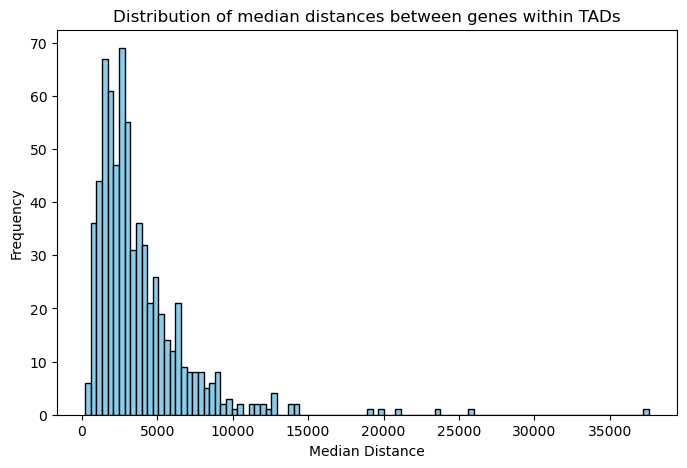

In [1]:
#plotting distribution of median distances between genes per tad
import matplotlib.pyplot as plt

# Initialize a list to store the values from column 4
distances = []

# Read the file and extract column 4 values
with open('tad_exp_dist.bed', 'r') as file:
    for line in file:
        parts = line.strip().split('\t')
        if len(parts) >= 4:
            distances.append(float(parts[3]))

# Plot the histogram
plt.figure(figsize=(8, 5))
plt.hist(distances, bins=100, color='skyblue', edgecolor='black')
plt.xlabel('Median Distance')
plt.ylabel('Frequency')
plt.title('Distribution of median distances between genes within TADs')
plt.show()

In [2]:
#split TADs into 4 quartiles of median distances
import pandas as pd

# Load the data into a DataFrame
data = pd.read_csv('tad_exp_dist.bed', sep='\t', header=None)
data.columns = ['chr', 'tad_start', 'tad_end', 'median_distance']

# Calculate the quartiles for the 'median_distance' column
quartiles = data['median_distance'].quantile([0.25, 0.5, 0.75])

# Assign each row to a quartile
data['quartile'] = pd.cut(data['median_distance'], 
                          bins=[-float('inf'), quartiles[0.25], quartiles[0.5], quartiles[0.75], float('inf')],
                          labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Write each quartile to a separate file
for q in ['Q1', 'Q2', 'Q3', 'Q4']:
    quartile_data = data[data['quartile'] == q]
    quartile_data.drop(columns=['quartile']).to_csv(f'tad_exp_dist_{q}.bed', sep='\t', index=False, header=False)

print("Data has been split into quartiles and saved to separate files: tad_exp_dist_Q1.bed, tad_exp_dist_Q2.bed, tad_exp_dist_Q3.bed, tad_exp_dist_Q4.bed.")

Data has been split into quartiles and saved to separate files: tad_exp_dist_Q1.bed, tad_exp_dist_Q2.bed, tad_exp_dist_Q3.bed, tad_exp_dist_Q4.bed.


In [3]:
!wc -l tad_exp_dist_Q1.bed
!wc -l tad_exp_dist_Q2.bed
!wc -l tad_exp_dist_Q3.bed
!wc -l tad_exp_dist_Q4.bed

170 tad_exp_dist_Q1.bed
169 tad_exp_dist_Q2.bed
169 tad_exp_dist_Q3.bed
170 tad_exp_dist_Q4.bed


### Same for nonTADs

In [1]:
import pybedtools

# Load TADs and genes
tads = pybedtools.BedTool('nontads_exp.bed')
genes = pybedtools.BedTool('az_genes.bed')

intersected_genes = tads.intersect(genes, wa=True, wb=True, F=1)  
intersected_genes.saveas('nontads_exp_genes.bed')

***** WARNING: File az_genes.bed has a record where naming convention (leading zero) is inconsistent with other files:
chr10	37926	50143

***** WARNING: File az_genes.bed has a record where naming convention (leading zero) is inconsistent with other files:
chr10	37926	50143



<BedTool(nontads_exp_genes.bed)>

In [2]:
#calculate median distance between genes per nontad
import numpy as np
from collections import defaultdict

# Load intersected TAD and gene data
tad_gene_file = 'nontads_exp_genes.bed'
output_file = 'nontad_exp_dist.bed'

# Dictionary to hold TADs and their corresponding gene start-end coordinates
tad_genes = defaultdict(list)

# Read the TAD-gene intersections
with open(tad_gene_file, 'r') as f:
    for line in f:
        parts = line.strip().split('\t')
        if len(parts) < 6:
            print(f"Skipping line, not enough columns: {line.strip()}")
            continue  # Skip lines that don't have the expected number of columns
        
        # Extract TAD information and gene coordinates
        tad_chr = parts[0]
        tad_start = int(parts[1])
        tad_end = int(parts[2])
        gene_start = int(parts[4])
        gene_end = int(parts[5])
        
        # Group genes by TAD coordinates
        tad_genes[(tad_chr, tad_start, tad_end)].append((gene_start, gene_end))

# Debug: Print number of TADs found
print(f"Found {len(tad_genes)} unique TADs.")

# Prepare to write output
with open(output_file, 'w') as out:
    # For each unique TAD, calculate the median distance between genes
    for (tad_chr, tad_start, tad_end), genes in tad_genes.items():
        # Sort gene starts and ends
        gene_starts = sorted(gene[0] for gene in genes)
        gene_ends = sorted(gene[1] for gene in genes)

        # Debug: Print genes associated with the current TAD
        print(f"TAD: {tad_chr}:{tad_start}-{tad_end} has {len(genes)} genes.")

        # Calculate distances between adjacent genes
        distances = []
        for i in range(len(gene_starts) - 1):
            distance = gene_starts[i + 1] - gene_ends[i]  # distance = gene2_start - gene1_end
            if distance > 0:  # Only consider positive distances
                distances.append(distance)
        
        # Calculate median distance
        if distances:  # Check if there are distances to calculate median
            median_distance = np.median(distances)
        else:
            median_distance = 0  # If no distances, set to 0 or you can skip this TAD
            print(f"No valid distances for TAD {tad_chr}:{tad_start}-{tad_end}. Setting median distance to 0.")

        # Write the results to the output file
        out.write(f"{tad_chr}\t{tad_start}\t{tad_end}\t{median_distance}\n")

print(f"Median distances calculated and saved to {output_file}.")

Found 569 unique TADs.
TAD: chr01:1-84999 has 15 genes.
TAD: chr01:10400001-10474999 has 10 genes.
TAD: chr01:10840001-11264999 has 48 genes.
TAD: chr01:11705001-11904999 has 12 genes.
TAD: chr01:12100001-12689999 has 47 genes.
TAD: chr01:12870001-13464999 has 45 genes.
TAD: chr01:13515001-13864999 has 30 genes.
TAD: chr01:13930001-15194999 has 105 genes.
TAD: chr01:15255001-15869999 has 58 genes.
TAD: chr01:16065001-16459999 has 30 genes.
TAD: chr01:16540001-18684999 has 117 genes.
TAD: chr01:18720001-19194999 has 43 genes.
TAD: chr01:1925001-2739999 has 91 genes.
TAD: chr01:19265001-19729999 has 35 genes.
TAD: chr01:19830001-19964999 has 9 genes.
TAD: chr01:20040001-21779999 has 127 genes.
TAD: chr01:21915001-22179999 has 18 genes.
TAD: chr01:22255001-22794999 has 62 genes.
TAD: chr01:23105001-23629999 has 71 genes.
TAD: chr01:23795001-23984999 has 16 genes.
TAD: chr01:24275001-24554999 has 25 genes.
TAD: chr01:24755001-24859999 has 6 genes.
TAD: chr01:25165001-25254999 has 7 genes.


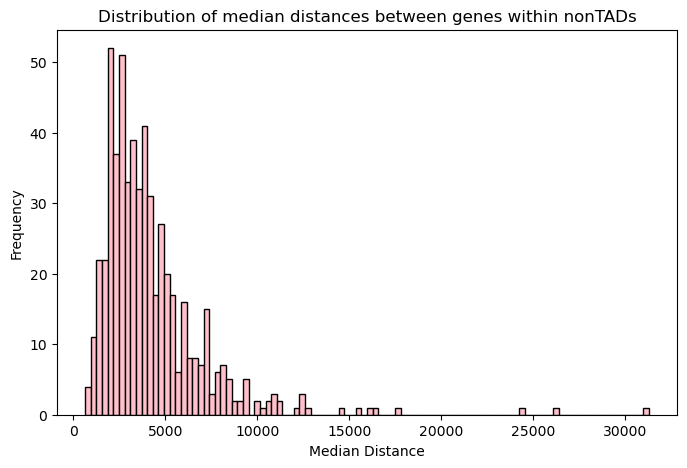

In [1]:
#plotting distribution of median distances between genes per nontad
import matplotlib.pyplot as plt

# Initialize a list to store the values from column 4
distances = []

# Read the file and extract column 4 values
with open('nontad_exp_dist.bed', 'r') as file:
    for line in file:
        parts = line.strip().split('\t')
        if len(parts) >= 4:
            distances.append(float(parts[3]))

# Plot the histogram
plt.figure(figsize=(8, 5))
plt.hist(distances, bins=100, color='pink', edgecolor='black')
plt.xlabel('Median Distance')
plt.ylabel('Frequency')
plt.title('Distribution of median distances between genes within nonTADs')
plt.show()

In [2]:
#split TADs into 4 quartiles of median distances
import pandas as pd

# Load the data into a DataFrame
data = pd.read_csv('nontad_exp_dist.bed', sep='\t', header=None)
data.columns = ['chr', 'tad_start', 'tad_end', 'median_distance']

# Calculate the quartiles for the 'median_distance' column
quartiles = data['median_distance'].quantile([0.25, 0.5, 0.75])

# Assign each row to a quartile
data['quartile'] = pd.cut(data['median_distance'], 
                          bins=[-float('inf'), quartiles[0.25], quartiles[0.5], quartiles[0.75], float('inf')],
                          labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Write each quartile to a separate file
for q in ['Q1', 'Q2', 'Q3', 'Q4']:
    quartile_data = data[data['quartile'] == q]
    quartile_data.drop(columns=['quartile']).to_csv(f'nontad_exp_dist_{q}.bed', sep='\t', index=False, header=False)

print("Data has been split into quartiles and saved to separate files: tad_exp_dist_Q1.bed, tad_exp_dist_Q2.bed, tad_exp_dist_Q3.bed, tad_exp_dist_Q4.bed.")

Data has been split into quartiles and saved to separate files: tad_exp_dist_Q1.bed, tad_exp_dist_Q2.bed, tad_exp_dist_Q3.bed, tad_exp_dist_Q4.bed.


In [2]:
!wc -l nontad_exp_dist_Q1.bed
!wc -l nontad_exp_dist_Q2.bed
!wc -l nontad_exp_dist_Q3.bed
!wc -l nontad_exp_dist_Q4.bed

143 nontad_exp_dist_Q1.bed
142 nontad_exp_dist_Q2.bed
142 nontad_exp_dist_Q3.bed
142 nontad_exp_dist_Q4.bed
